第十三章 卷积神经网络

一、视觉皮层的结构

1、卷积层

2、过滤层

3、堆叠多个特征映射

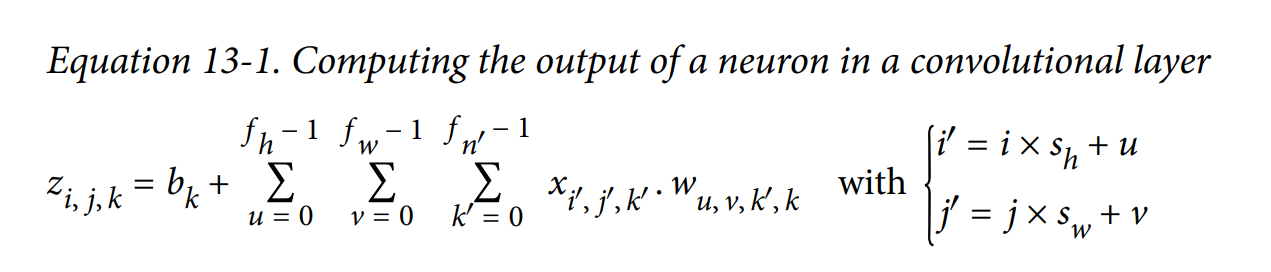

4、tensorflow implementation

需要优化的参数包括卷积层包含的过滤器的数量、过滤器的高度、过滤器的宽度、设置步长、设置填充/

In [1]:
#导入必要的模块
import os
os.environ['OMP_NUM_THREADS']="7"
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [2]:
#构建卷积神经网络的示例

#下载并准备CIFAR10数据集
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()
#将像素映射到0-1之间
x_train,x_test=x_train/255.0,x_test/255.0


A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8481s 50us/step


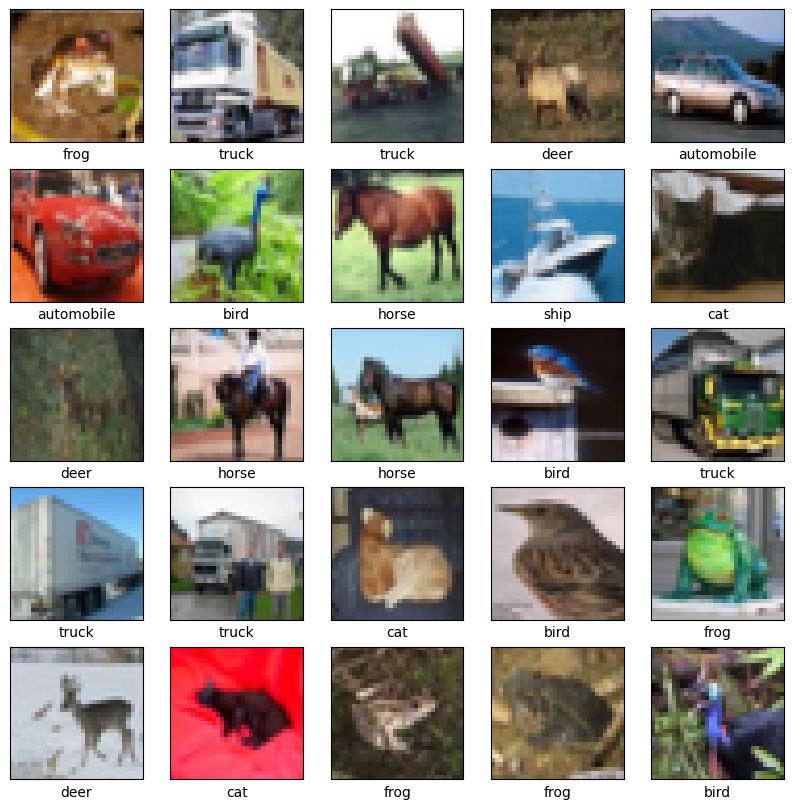

In [4]:
#可视化训练集验证数据集的正确性
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [5]:
#构建卷积神经网络层
cnn_model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3),strides=[2,2],padding="same"),
    #该二维卷积层包含32个滤波器(卷积核)，每个滤波器的大小为(3*3)的像素
    tf.keras.layers.MaxPooling2D((2,2)),
    #添加一个最大池化层,池化窗口的大小为(2,2)的像素
    tf.keras.layers.Conv2D(64,(3,3),activation="relu",strides=[2,2],padding="same"),
    #卷积层的滤波器数量增多，可以捕捉更加复杂的特征
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu",strides=[2,2],padding="same"),
    #往下添加深度神经网络进行分类
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(10,activation="sigmoid")
])
cnn_model.summary()#获取建立的模型的所有信息

c:\Users\youyiting\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 16, 16, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 4, 4, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 1, 1, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,130 (238.79 KB)

 Trainable params: 61,130 (238.79 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#编译并训练神经网络模型
cnn_model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])
train_result=cnn_model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10


c:\Users\youyiting\anaconda3\lib\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6852 - loss: 0.8736 - val_accuracy: 0.6508 - val_loss: 0.9884
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6916 - loss: 0.8560 - val_accuracy: 0.6373 - val_loss: 1.0432
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7082 - loss: 0.8198 - val_accuracy: 0.6458 - val_loss: 1.0212
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7155 - loss: 0.8060 - val_accuracy: 0.6399 - val_loss: 1.0498
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7137 - loss: 0.7962 - val_accuracy: 0.6544 - val_loss: 1.0020
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7220 - loss: 0.7769 - val_accuracy: 0.6449 - val_loss: 1.0312
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7287 - loss: 0.7614 - val_accuracy: 0.6577 - val_loss: 0.9941
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7342 - loss: 0.7439 - val_accurac

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6480 - loss: 1.0316
该模型在测试集上的损失为1.0488717555999756,正确率为0.647599995136261


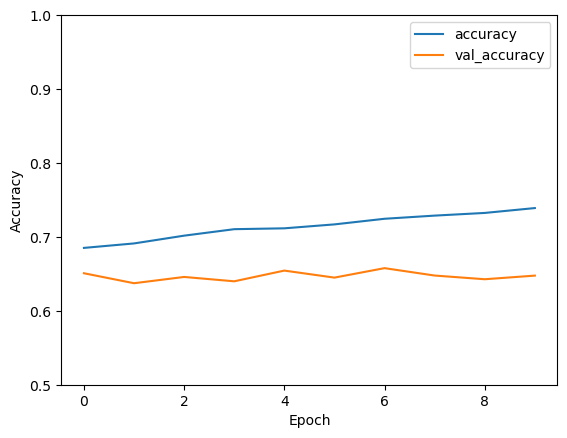

In [12]:
#评估模型
plt.plot(train_result.history["accuracy"],label="accuracy")
plt.plot(train_result.history["val_accuracy"],label="val_accuracy")
plt.ylim([0.5,1])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="upper right")
test_loss,test_accuracy=cnn_model.evaluate(x_test,y_test)
print(f"该模型在测试集上的损失为{test_loss},正确率为{test_accuracy}")

二、著名的卷积神经网络结构(需要回炉重造)

1、LeNet-5

2、GoogLeNet

3、ResNet